<a href="https://colab.research.google.com/github/MST47/NHATS-Clock-Drawing-CNN/blob/main/1_Supervised_CNN_NHAT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Clock Drawing Image Classification with Convolutional Neural Networks
### Stacey Beck and Ian Byrne

- Split data into sets of Training (x = image arrays ; y = labels), Test (~10% image arrays), and Validation (~10% of the Training).
- Build CNN using Pytorch for Training and Test:
  - Specify CUDA
  - 2D convolution, Normalization (for faster training), Non-linear Activation Function (ex. RELU), Max Pooling (downsampling to reduce learned parameters).
  - Define Layers
  - Build Forward and backward pass
  - Define optimizer (due to many - deep - nodes) ex) ADAM
  - Calculate Loss (BCE)
  - Calculate Accuracy, Precision, Recall (Confusion Matrix)
  - Plot ROC and print Confusion Matrix



In [ ]:
from google.colab import auth
from google.colab import drive

# First authenticate
auth.authenticate_user()

# Then mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Step 3: Unzip your file (if you have a zip file in your Drive)
!unzip -q "/content/drive/MyDrive/Nhats Dataset-20250829T164623Z-1-001.zip"

# Load the Dataset
**Load the NHATS_Round_11_SP_File_V2.dta**

In [ ]:
import pandas as pd

# Example: load one Round 11 file
df = pd.read_stata("Nhats Dataset/NHATS_R11_Final_Release_STATA_V2/NHATS_Round_11_SP_File_V2.dta")

print(df.head())


         spid       r11dlmlint     r11dresid     r10dresid      r9dresid  \
0  10000008.0  -1 Inapplicable  1 Community   1 Community   1 Community    
1  10000019.0  -1 Inapplicable  1 Community   1 Community   1 Community    
2  10000021.0  -1 Inapplicable  1 Community   1 Community   1 Community    
3  10000022.0  -1 Inapplicable  1 Community   1 Community   1 Community    
4  10000036.0  -1 Inapplicable  1 Community   1 Community   1 Community    

       r8dresid      r7dresid      r6dresid      r5dresid      r4dresid  ...  \
0  1 Community   1 Community   1 Community   1 Community   1 Community   ...   
1  1 Community   1 Community   1 Community   1 Community   1 Community   ...   
2  1 Community   1 Community   1 Community   1 Community   1 Community   ...   
3  1 Community   1 Community   1 Community   1 Community   1 Community   ...   
4  1 Community   1 Community   1 Community   1 Community   1 Community   ...   

  w11an2011wgt49 w11an2011wgt50 w11an2011wgt51 w11an2011wgt52 

In [ ]:
# Convert the data into CSV File
df.to_csv("NHATS_Round_11_SP_File_V2.csv", index=False)
nhat_label_df = pd.read_csv("NHATS_Round_11_SP_File_V2.csv")

In [ ]:
#'cg11dclkdraw' in nhat_label_df.columns
print(nhat_label_df['cg11dclkdraw'].value_counts())

cg11dclkdraw
4 Reasonably accurate depiction of a clock              1164
5 Accurate depiction of a clock (circular or square)     927
3 Mildly distorted depiction of a clock                  647
-1 Inapplicable                                          429
2 Moderately distorted depiction of a clock              270
-9 Missing                                               261
1 Severely distorted depiction of a clock                 60
-4 SP did not attempt to draw clock                       24
0 Not recognizable as a clock                             23
-7 SP refused to draw clock                               12
Name: count, dtype: int64


**Load and Cleaning the Data**

In [ ]:
# Load Rounds data
import warnings
warnings.filterwarnings("ignore")
round_data = []
nhat_label_df["round"] = 11
round_data = nhat_label_df[["spid", "cg11dclkdraw", "hc11disescn10", "round"]]

round_data.to_csv("round_data.csv", index=False)

rounds = pd.read_csv('round_data.csv')
rounds.head()

,spid,cg11dclkdraw,hc11disescn10,round
0,10000008.0,4 Reasonably accurate depiction of a clock,2 NO,11
1,10000019.0,3 Mildly distorted depiction of a clock,2 NO,11
2,10000021.0,4 Reasonably accurate depiction of a clock,2 NO,11
3,10000022.0,3 Mildly distorted depiction of a clock,2 NO,11
4,10000036.0,3 Mildly distorted depiction of a clock,2 NO,11


In [ ]:
print("Column values for clock scores: \n", rounds['cg11dclkdraw'].unique())
print("\nHealth score values: \n", rounds['hc11disescn10'].unique())
print("\nVariable types: \n", rounds.dtypes)
rounds[rounds['cg11dclkdraw'] == '-1 Inapplicable'].head()

Column values for clock scores: 
 ['4 Reasonably accurate depiction of a clock'
 '3 Mildly distorted depiction of a clock'
 '2 Moderately distorted depiction of a clock' '-1 Inapplicable'
 '5 Accurate depiction of a clock (circular or square)'
 '1 Severely distorted depiction of a clock' '-9 Missing'
 '-4 SP did not attempt to draw clock' '0 Not recognizable as a clock'
 '-7 SP refused to draw clock']

Health score values: 
 ['2 NO' '-1 Inapplicable' '1 YES' '-9 Missing' '-8 DK']

Variable types: 
 spid             float64
cg11dclkdraw      object
hc11disescn10     object
round              int64
dtype: object


,spid,cg11dclkdraw,hc11disescn10,round
7,10000049.0,-1 Inapplicable,-1 Inapplicable,11
15,10000083.0,-1 Inapplicable,-1 Inapplicable,11
17,10000088.0,-1 Inapplicable,-1 Inapplicable,11
28,10000175.0,-1 Inapplicable,-1 Inapplicable,11
31,10000200.0,-1 Inapplicable,-1 Inapplicable,11


In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
#!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 826, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 826 (delta 83), reused 79 (delta 79), pack-reused 739 (from 1)
Receiving objects: 100% (826/826), 10.35 MiB | 22.54 MiB/s, done.
Resolving deltas: 100% (446/446), done.
/content/MADSmilestone2


In [ ]:
import numpy as np

def clean_data(rounds_df):

    df = rounds_df
    hc_items = [
        ("2 NO", 2),
        (" 2 NO", 2),
        ("1 YES", 1),
        (" 1 YES", 1),
        ("-9 Missing", np.nan),
        ("-8 DK", np.nan),
        ("7 PREVIOUSLY REPORTED", 7),
        ("-1 Inapplicable", np.nan),
        ("-7 RF", np.nan),
    ]

    cg_items = [
        ("-2 Proxy says cannot ask SP", np.nan),
        ("-7 SP refused to draw clock", np.nan),
        ("-4 SP did not attempt to draw clock", np.nan),
        ("-3 Proxy says can ask SP but SP unable to answer", np.nan),
        ("-1 Inapplicable", np.nan),
        ("-9 Missing", np.nan),
    ]

    for item in hc_items:
        df.hc11disescn10.replace(item[0], item[1], inplace=True)

    # Remove cg1dclkdraw subjects that did not draw a clock, or image data is missing
    for item in cg_items:
        df.cg11dclkdraw.replace(item[0], item[1], inplace=True)

    # Drop all NaN
    df.dropna(inplace=True)

    # Change IDs to string value for streaming images
    df["spid"] = df["spid"].astype("string")

    # Keep just the 8 digit value in spid, removing float value
    df["spid"] = df["spid"].str.extract("(\d+).", expand=False)

    return df


In [ ]:
import Labeling.clean_rounds as cr

# Load the cleaned dataframe
cleaned_rounds = clean_data(rounds)
cleaned_rounds.head()

,spid,cg11dclkdraw,hc11disescn10,round
0,10000008,4 Reasonably accurate depiction of a clock,2.0,11
1,10000019,3 Mildly distorted depiction of a clock,2.0,11
2,10000021,4 Reasonably accurate depiction of a clock,2.0,11
3,10000022,3 Mildly distorted depiction of a clock,2.0,11
4,10000036,3 Mildly distorted depiction of a clock,2.0,11


In [ ]:
#Check that we only have healthscores of 1, 2, 7 and subjects that have drawn clocks
print("health score check: \n",cleaned_rounds.cg11dclkdraw.unique())
print("\n clock scores check: \n",cleaned_rounds['hc11disescn10'].unique())

health score check: 
 ['4 Reasonably accurate depiction of a clock'
 '3 Mildly distorted depiction of a clock'
 '2 Moderately distorted depiction of a clock'
 '5 Accurate depiction of a clock (circular or square)'
 '1 Severely distorted depiction of a clock'
 '0 Not recognizable as a clock']

 clock scores check: 
 [2. 1.]


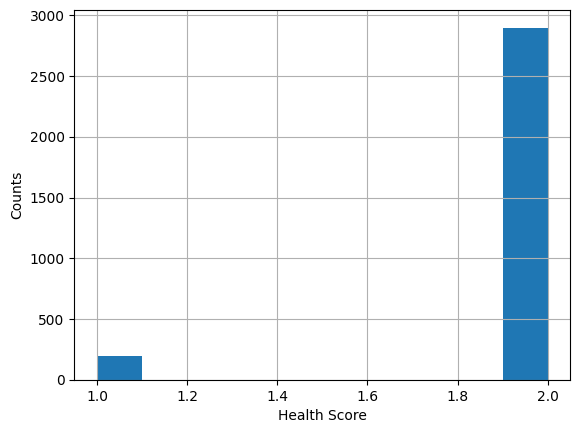

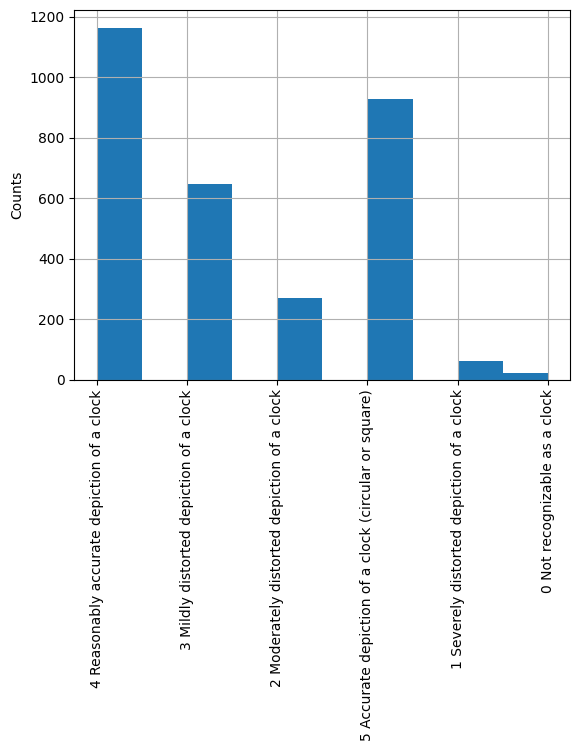

In [ ]:
import matplotlib.pyplot as plt


# Check balance of dataset
a = cleaned_rounds.hc11disescn10.hist()
plt.xlabel("Health Score")
plt.ylabel("Counts")
plt.show(a)


b = cleaned_rounds.cg11dclkdraw.hist()
b.tick_params(axis='x', labelrotation = 90)
plt.ylabel("Counts")
plt.show(b)

In [ ]:
df = cleaned_rounds.copy()

# Assign label of 2 or 1
# assign label value of 0 to the previous rounds where diagnosis changed from a 2.0 to 1.0
# diagnoses value of 7 corresponds to previous round value of 1, label stays a 1
df["label"] = [2 if x == 2 else 1 for x in df["hc11disescn10"]]
label1 = df[df["label"] == 1]
df.loc[(df["label"] != 1) & df["spid"].isin(label1["spid"]), "label"] = 0


labeled_data = df
labeled_data.head()

,spid,cg11dclkdraw,hc11disescn10,round,label
0,10000008,4 Reasonably accurate depiction of a clock,2.0,11,2
1,10000019,3 Mildly distorted depiction of a clock,2.0,11,2
2,10000021,4 Reasonably accurate depiction of a clock,2.0,11,2
3,10000022,3 Mildly distorted depiction of a clock,2.0,11,2
4,10000036,3 Mildly distorted depiction of a clock,2.0,11,2


<Axes: >

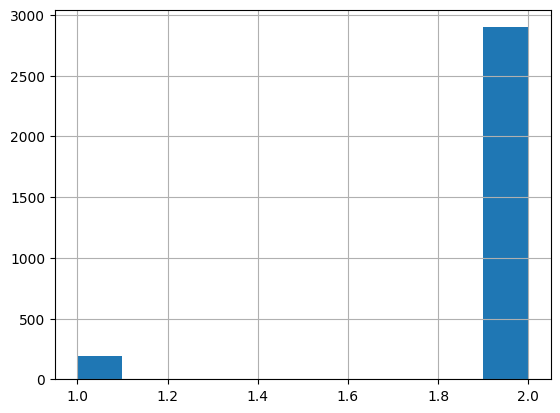

In [ ]:
# Look at distribution of labels
labeled_data.label.hist()

In [ ]:
labeled_data['label'].value_counts()


,count
label,
2,2898
1,192


**Labeling the Data**

In [ ]:
def create_labels(rounds_clean):
    """Create labels: label 0 = pre-dementia, 1 = post-dementia, 2 = normal
    Create Normal Label for all entries, base case, then assign value
    of 1 to 1's and 7's"""

    df = rounds_clean.copy()

    # Assign label of 2 or 1
    # assign label value of 0 to the previous rounds where diagnosis changed from a 2.0 to 1.0
    # diagnoses value of 7 corresponds to previous round value of 1, label stays a 1
    df["label"] = [2 if x == 2 else 1 for x in df["hc11disescn10"]]
    label1 = df[df["label"] == 1]
    df.loc[(df["label"] != 1) & df["spid"].isin(label1["spid"]), "label"] = 0

    return df

In [ ]:
labeled_data = create_labels(cleaned_rounds)
labeled_data.head()

,spid,cg11dclkdraw,hc11disescn10,round,label
0,10000008,4 Reasonably accurate depiction of a clock,2.0,11,2
1,10000019,3 Mildly distorted depiction of a clock,2.0,11,2
2,10000021,4 Reasonably accurate depiction of a clock,2.0,11,2
3,10000022,3 Mildly distorted depiction of a clock,2.0,11,2
4,10000036,3 Mildly distorted depiction of a clock,2.0,11,2


In [ ]:
# Create a csv file of this dataframe
labeled_data.to_csv('labeld_ai_df.csv', index = False)

# **Model Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
import Labeling.splitting as split_
import Labeling.label_data as ld
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataframes to create the dictionaries
ai_label_df = pd.read_csv('labeld_ai_df.csv')
ai_label_df.head()

,spid,cg11dclkdraw,hc11disescn10,round,label
0,10000008,4 Reasonably accurate depiction of a clock,2.0,11,2
1,10000019,3 Mildly distorted depiction of a clock,2.0,11,2
2,10000021,4 Reasonably accurate depiction of a clock,2.0,11,2
3,10000022,3 Mildly distorted depiction of a clock,2.0,11,2
4,10000036,3 Mildly distorted depiction of a clock,2.0,11,2


## Get Individual participant IDs and labels per round
- useful for pulling in exact images per round
- create text file to store dictionary

- create one dictionary file for AI Crowd method of labeling
- create final custom label dictionary (using NHAT and AI crowd labeling)
- create one dictionary file using clock drawing score as labels

In [ ]:
print(ai_label_df['round'].value_counts(), len(ai_label_df)) # AI CROWD


round
11    3090
Name: count, dtype: int64 3090


In [ ]:
def get_ids(df, label):
    label = 'label'

    indexed_df = df[["round", "spid", label]]
    d = {}

    for round, id, lab in zip(
        indexed_df["round"].values, indexed_df["spid"].values, indexed_df[label].values
    ):
        d.setdefault(round, []).append((id, lab))

    return d

In [ ]:
# get round, id, label for AI crowd method
ids_ai = get_ids(ai_label_df, 'label')

# Writing dictionary to text file for AI Crowd method of labeling
try:
    id_file = open('/content/roundIdLabelDict.txt', 'wt')
    id_file.write(str(ids_ai))
    id_file.close()

except:
    print("Unable to write to file")


# **Train, Validate, Testing Dataset**

length of training set:  2781
length of validation set:  155
length of test set:  154
Total length:  3090
Train data: 



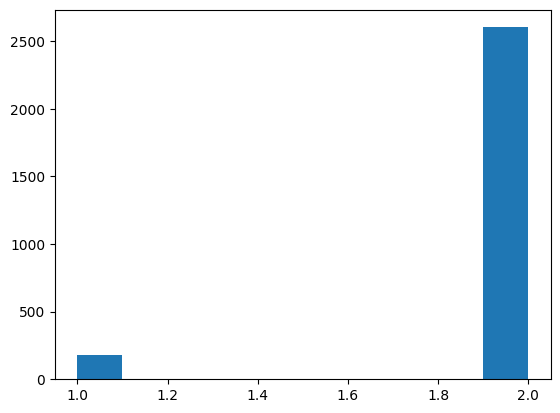

Val data: 



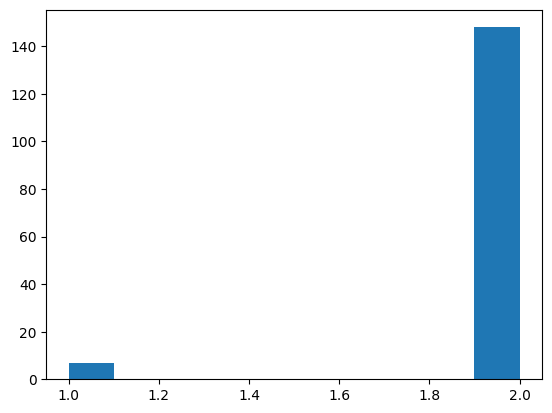

Test data: 



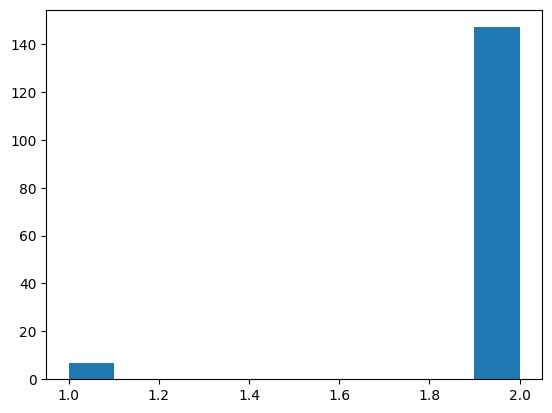

In [ ]:
train, val, test = split_.split_data(ai_label_df, 0.1, .5, 'label')

2000

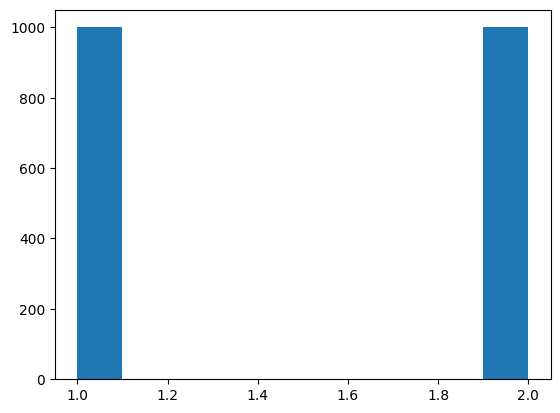

In [ ]:
#train_zero_samp = train[train['label'] == 0].sample(n = 8000, random_state = 42)
train_one_samp = train[train['label'] == 1].sample(n = 1000, replace = True, random_state = 42)
train_two_samp = train[train['label'] == 2].sample(n = 1000, random_state = 42)
balanced_train = pd.concat([train_one_samp, train_two_samp])

plt.hist(balanced_train.label)

len(balanced_train)

In [ ]:
# Create Training dictionary
train_dict_bal = get_ids(balanced_train, 'label')
print("Length of value:", len(train_dict_bal[11]))
# Writing dictionary to text file for training
try:
    id_file = open('/content/train_dict_bal.txt', 'wt')
    id_file.write(str(train_dict_bal))
    id_file.close()

except:
    print("Unable to write to file")

Length of value: 2000


In [ ]:
# Create Validation dictionary
val_dict_nobal = get_ids(val, 'label')
print("Length of value:", len(val_dict_nobal[11]))
# Writing dictionary to text file for validation
try:
    id_file = open('/content/val_dict_nobal.txt', 'wt')
    id_file.write(str(val_dict_nobal))
    id_file.close()

except:
    print("Unable to write to file")

Length of value: 155


In [ ]:
# Create Test dictionary
test_dict_nobal = get_ids(test, 'label')
print("Length of value:", len(test_dict_nobal[11]))
# Writing dictionary to text file for testing
try:
    id_file = open('/content/test_dict_nobal.txt', 'wt')
    id_file.write(str(test_dict_nobal))
    id_file.close()

except:
    print("Unable to write to file")

Length of value: 154


# Build CNN Model using Pytorch


In [ ]:
!pip install torchmetrics

# General Libraries
import pandas as pd
import numpy as np
import ast
import logging
import os
import requests
import tempfile


# Custom Libraries
import Loading.load_data as ld    #1.  Load the data
import ImagePlayground.Images     #2.  Images

# Pytroch Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torchmetrics
from torch.nn.utils import spectral_norm

# To Evaluate model
from tqdm import tqdm
import torchmetrics
from torchmetrics import ConfusionMatrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To visualize model
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage.io import imread

# To split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 39.5 MB/s eta 0:00:00


### Building and Training
Architecture choices influenced from:

https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/

https://medium.datadriveninvestor.com/five-powerful-cnn-architectures-b939c9ddd57b

https://towardsdatascience.com/how-does-sparse-convolution-work-3257a0a8fd1

In [ ]:
# Define some of the hyperparameters and training variables
#epochs = 2
train_batch_size = 8
val_batch = 4
test_batch = 1
learning_rate = 1e-3
kernel_size = 3
stride = 1
padding = 1 #2*floor(3/2)
weight_decay = 1e-5


# Define file extension to use for new data saves
extension_ = "mod1"

# Normalize data if rgb and set rgb_val to True to convert
normalize_ = False

# Define which round to get data from
rnd = 11

# Use numpy data
numpy_ = False

# Define model extensions for naming file (which model do we want to train on)
model_ext = "4_fix"
m = 'First model'
#m = 'pre-trained'
#m = 'pre-trained-res'
#m = 'resnet'


In [ ]:
import re

# --------------------- Training Data ------------
# Load the file
with open("/content/train_dict_bal.txt", "r") as f:
    text = f.read()

# Remove np.int64(...) and just keep the number
cleaned_text = re.sub(r"np\.int64\((\d+)\)", r"\1", text)

# Save as new file
with open("/content/train_dict_bal.txt", "w") as f:
    f.write(cleaned_text)

# --------------------- Validation Data ------------
# Load the file
with open("/content/val_dict_nobal.txt", "r") as f:
    text = f.read()

# Remove np.int64(...) and just keep the number
cleaned_text = re.sub(r"np\.int64\((\d+)\)", r"\1", text)

# Save as new file
with open("/content/val_dict_nobal.txt", "w") as f:
    f.write(cleaned_text)

# --------------------- Testing Data ------------
# Load the file
with open("/content/test_dict_nobal.txt", "r") as f:
    text = f.read()

# Remove np.int64(...) and just keep the number
cleaned_text = re.sub(r"np\.int64\((\d+)\)", r"\1", text)

# Save as new file
with open("/content/test_dict_nobal.txt", "w") as f:
    f.write(cleaned_text)

In [ ]:
path = "/content/train_dict_bal.txt"
cust_file = open(path, "r")
#print(cust_file.readline())      # 3. Convert the images into dictionary format
contents = cust_file.read()
dictionarytr = ast.literal_eval(contents)
cust_file.close()

path1 = '/content/val_dict_nobal.txt'
cust_file = open(path1, "r")
#print(cust_file.readline())
contents = cust_file.read()
dictionaryv = ast.literal_eval(contents)
cust_file.close()

path2 = '/content/test_dict_nobal.txt'
cust_file = open(path2, "r")
#print(cust_file.readline())
contents = cust_file.read()
dictionaryts = ast.literal_eval(contents)
cust_file.close()

In [ ]:
print("Length of value:", len(dictionarytr[11]))

Length of value: 2000


In [ ]:
for id, val in dictionarytr.items():
  print("Round {} length is {}".format(str(id), str(len(val))))

Round 11 length is 2000


In [ ]:
import Loading.load_data as loading

import io
import logging
import os
import ast
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import glob

# List files in the directory
path = '/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2'
files = glob.glob(os.path.join(path, '*.tif'))
files[:5]

['/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2/20000070.tif',
 '/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2/10000765.tif',
 '/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2/20003756.tif',
 '/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2/10000616.tif',
 '/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2/10000659.tif']

In [ ]:
class ResizedClocks(Dataset):
    # Resized clock drawing dataset
    def __init__(self, round, round_labels, rgb=None, transform=None):
        self.round = round
        self.vals = round_labels
        self.base_path = '/content/Nhats Dataset/NHATS_R11_ClockDrawings_V2'
        self.rgb = rgb
        self.transform = transform

    def __len__(self):
        return len(self.vals)

    def __getitem__(self, idx):
        spid = self.vals[idx][0]
        label = self.vals[idx][1]
        filename = f"{spid}.tif"
        file_path = os.path.join(self.base_path, filename)

        try:
            im = Image.open(file_path)

            # Convert image
            if self.rgb:
                im = im.convert("RGB")
            else:
                im = im.convert("L")  # grayscale

            # Resize
            im = im.resize((160, 207))

            # Apply transform if provided (e.g., ToTensor, Normalize)
            if self.transform:
                im = self.transform(im)
            else:
                im = torch.tensor(np.array(im), dtype=torch.float32)

            # Return (image, label) instead of dict
            return im, torch.tensor(label, dtype=torch.long)

        except FileNotFoundError:
            return None


In [ ]:
def collate_fn(batch):
    """Filter out None samples (e.g., corrupt or missing files)."""
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)

# Initialize transformation: convert image to tensor and normalize
if normalize_:
    processes = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    rgb_val = True
else:
    processes = transforms.ToTensor()
    rgb_val = False

# Get datasets
train_set = ResizedClocks(rnd, dictionarytr[rnd], transform=processes, rgb=rgb_val)
val_set = ResizedClocks(rnd, dictionaryv[rnd], transform=processes, rgb=rgb_val)
test_set = ResizedClocks(rnd, dictionaryts[rnd], transform=processes, rgb=rgb_val)

# Define Dataloaders
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=train_batch_size, shuffle=True,
    num_workers=6, collate_fn=collate_fn
)

validate_loader = torch.utils.data.DataLoader(
    val_set, batch_size=val_batch, shuffle=True,
    num_workers=6, collate_fn=collate_fn
)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=test_batch, shuffle=False,
    collate_fn=collate_fn
)
for xb, yb in train_loader:
    print("Batch X:", xb.shape, "dtype:", xb.dtype)
    print("Batch Y:", yb.shape, "dtype:", yb.dtype)
    break

print(len(train_loader))

Batch X: torch.Size([8, 1, 207, 160]) dtype: torch.float32
Batch Y: torch.Size([8]) dtype: torch.int64
250


torch.FloatTensor


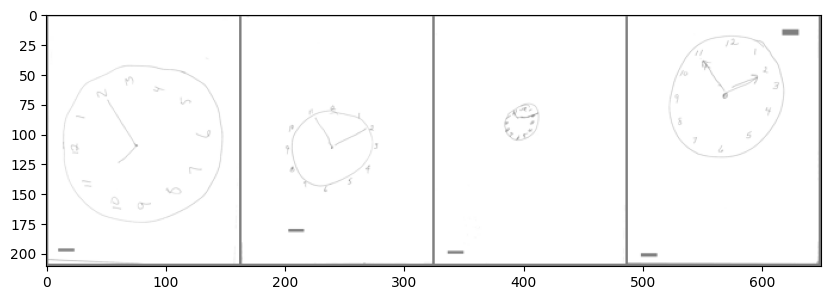

Labels:
    2              2              2              2


In [ ]:
# Visualize the validation data if grayscale
# Code taken and adapted from Pytorch tutorial
#Labels
classes = (0, 1, 2)
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    plt.figure(figsize=(10,15))
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

batch = 8
# get some random training images
dataiter = iter(validate_loader)

images, labels = next(dataiter)   # <-- use next() instead of .next()

#images, labels = dataiter.next()
#print(images.size())
print(images.type())
#images = images.unsqueeze(1)
#print(type(np.float32(labels)))
# show images
ims = torchvision.utils.make_grid(images, nrow = 4)
imshow(ims)
# print labels
print('Labels:')
print('          '.join('%5s' % classes[labels[j]] for j in range(val_batch)))

#Printing as RGB, just using basic pytorch dataloader likely converting to rbg

In [ ]:
 # Set to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def set_model(m, model_ext, device):

  if torch.cuda.is_available():

    if m == 'First model':
      # Create model object
      model = ConvNet()
      model = model.to(device)#(float).cuda()
      print("First model training on GPU")

    elif m == 'pre-trained':
      mPATH = '/content/gdrive/MyDrive/Colab Notebooks/Models/cnn_512_662.model{}'.format(model_ext)
      model = ConvNet()
      model.load_state_dict(torch.load(mPATH))
      model.to(device)
      print('Pretrained CNN {} training on GPU'.format(model_ext))


    elif m == 'resnet':
      model = models.resnet50(pretrained=True)
      num_ftrs = model.fc.in_features
      model.fc = nn.Linear(num_ftrs, 3)
      model = model.to(device)
      print('RESNET Model training on GPU')


    elif m == 'pre-trained-res':
      mPATH = '/content/gdrive/MyDrive/Colab Notebooks/Models/cnn_512_662.model{}'.format(model_ext)
      model = models.resnet50()
      num_ftrs = model.fc.in_features
      model.fc = nn.Linear(num_ftrs, 3)
      model.load_state_dict(torch.load(mPATH))
      model.to(device)
      print('Pretained Resnet trained on our data {} training on GPU'.format(model_ext))

  else:
    print("CUDA is not available. Turn on GPU")



  return model


print(device)

cpu


In [ ]:

#original size: 2560, 3312
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    # without considering batch size: Input shape : (None,368, 284, 1) , parameters: (3*3*1*16+16) = 160
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, # one input channel gray scale, 16 filters out
                            kernel_size = 3, stride = 1, padding = 1) #Out:(None,386, 284, 16). ### TRY kernel 7x7 padding 3
    self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,
                          kernel_size = 3, stride = 1, padding = 1) #params: (3*3*16*32+32) = 4640
    self.pool1 = nn.MaxPool2d(2, 2) #Out: (None, 184, 142, 32)
    self.bn1 = nn.BatchNorm2d(32)

    self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,
                          kernel_size = 3, stride = 1, padding = 1) #params: (3*3*16*32+32) = 4640
    self.conv4 = nn.Conv2d(in_channels = 64, out_channels = 64,
                          kernel_size = 3, stride = 1, padding = 1) # params: (3*3*32*32+32) = 9248
    self.pool2 = nn.MaxPool2d(2, 2) #Output shape = (None, 92, 71, 64)
    self.bn2 = nn.BatchNorm2d(64)

    #self.conv5 = nn.Conv2d(in_channels = 64, out_channels = 128,
                          #kernel_size = 3, stride = 1, padding = 1) # params: (3*3*32*32+32) = 9248
    self.conv6 = nn.Conv2d(in_channels = 64, out_channels = 128,
                          kernel_size = 3, stride = 1, padding = 1) # params: (3*3*32*32+32) = 9248
    self.pool3 = nn.MaxPool2d(2, 2) #Output shape = (None, 46, 35, 128)
    self.bn3 = nn.BatchNorm2d(128)
    self.do2 = nn.Dropout(0.3)


    # Fully connected layer
    self.fc1 = nn.Linear(64000,60) #most recent original size of: 512, 662 -->64 x 82
    self.do3 = nn.Dropout(0.4) #40 % probability
    #self.fc3 = nn.Linear(60, 30)
    self.fc2 = nn.Linear(60, 3) # left with 3 for the three classes



  def forward(self, x):
    x = self.bn1(self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))))
    x = self.bn2(self.pool2(F.relu(self.conv4(F.relu(self.conv3(x))))))
    #x = self.bn3(self.pool3(F.relu(self.conv6(F.relu(self.conv5(x))))))
    x = self.bn3(self.pool3(F.relu(self.conv6((x)))))
    x = self.do2(x)
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x))
    x = self.do3(x)
    x = self.fc2(x)
    return x

# Get model
model = set_model(m, model_ext, device)

# Print weights
#for param in model.parameters():
  #print(str(param.data.numpy().shape)+'\n')
  #print("weights fc1: ", model.fc1.weight)

# Loss function
criterion = nn.CrossEntropyLoss(reduction="mean")

# Optimizer (can use SGD or ADAM)
#optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)#, momentum = 0.9) #or ADAM/ momentum
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay= weight_decay)

#scheduler = lr_scheduler.StepLR(optimizer, step_size = 4, gamma=0.1)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience = 4)

print(model)

accuracy_stats = {
    'train': [],
    'val': []
  }


loss_stats = {
    'train': [],
    'val': []
    }



def train_val_model(epochs):
  for epoch in range(1, epochs + 1):

    # TRAINING *****************************************************************

    train_epoch_loss = 0
    train_epoch_acc = 0

    # set model in training mode
    model.train()
    print('\nEpoch$ : %d'%epoch)
    for x_train_batch, y_train_batch in tqdm(train_loader):
        x_train_batch = x_train_batch.to(device, dtype=torch.float32)
        y_train_batch = y_train_batch.to(device)

        optimizer.zero_grad()
        y_train_pred = model(x_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = accuracy(y_train_pred, y_train_batch)

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc



    # VALIDATION****************************************************************

    with torch.set_grad_enabled(False):
      val_epoch_loss = 0
      val_epoch_acc = 0

      model.eval()
      for x_val_batch, y_val_batch in tqdm(validate_loader):

        x_val_batch =  x_val_batch.to(device)#.to(float)
        y_val_batch = y_val_batch.to(device)

        # Forward pass
        y_val_pred = model(x_val_batch)#.to(float)
        val_loss = criterion(y_val_pred, y_val_batch)
        val_acc = accuracy(y_val_pred, y_val_batch)

        val_epoch_loss += val_loss
        val_epoch_acc += val_acc

    # Prevent plateauing validation loss
    scheduler.step(val_epoch_loss/len(validate_loader))

    loss_stats['train'].append(float(train_epoch_loss/len(train_loader)))
    loss_stats['val'].append(float(val_epoch_loss/len(validate_loader)))
    accuracy_stats['train'].append(float(train_epoch_acc/len(train_loader)))
    accuracy_stats['val'].append(float(val_epoch_acc/len(validate_loader)))



    print(f'Epoch {epoch+0:03}: Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(validate_loader):.5f}')
    print(f'Train Acc: {train_epoch_acc/len(train_loader):.3f} | Val Acc: {val_epoch_acc/len(validate_loader):.3f}')






def accuracy(y_pred, y_true):
    y_pred_softmax = torch.log_softmax(y_pred, dim=1)
    _, y_pred_labels = torch.max(y_pred_softmax, dim=1)
    correct = (y_pred_labels == y_true).sum().item()
    return correct / len(y_true)



if __name__ == '__main__':
    train_val_model(2)
    print("Final accuracy stats:", accuracy_stats)
    print("Final loss stats:", loss_stats)

#***************

CUDA is not available. Turn on GPU


UnboundLocalError: cannot access local variable 'model' where it is not associated with a value

# Visualize the Training and Validation


In [ ]:
import os
os.makedirs("/content", exist_ok=True)
print(os.listdir())


In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_acc_df.to_csv('/content/acc{}.csv'.format(extension_), index = False)
train_val_loss_df.to_csv('/content/loss{}.csv'.format(extension_), index = False)
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')
fig.savefig('/content/acc_loss{}.png'.format(extension_))

# Evaluate the model using Test Set

In [ ]:
print("Length of test dataset:", len(test_loader.dataset))
print("Number of batches in test_loader:", len(test_loader))

In [ ]:
for i in range(5):
    try:
        x, y = test_loader.dataset[i]
        print(f"Sample {i} OK -> x shape: {x.shape}, y: {y}")
    except Exception as e:
        print(f"Error at sample {i}: {e}")

In [ ]:
# Accuracy for 3 classes
test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=3).to(device)

with torch.no_grad():
    model.eval()
    for x_test, y_test in tqdm(test_loader):
        x_test, y_test = x_test.to(device), y_test.to(device)

        y_pred = model(x_test)
        y_class = torch.argmax(y_pred, dim=1)

        test_acc.update(y_class.cpu(), y_test.cpu())

    total_test_acc = test_acc.compute()
    print('test acc: ', total_test_acc.item())
    test_acc.reset()


## Create Confusion Matrix

In [ ]:
all_pred = []
all_preds = torch.tensor([])
y_test = torch.tensor([])
with torch.set_grad_enabled(False):
  model.eval()
  for x_test_batch, y_test_batch in tqdm(test_loader):
    x_test_batch = x_test_batch.to(device)#.to(float).to(device)
    y_test_pred = model(x_test_batch)
    _, y_pred_ = torch.max(y_test_pred, dim = 1)
    #print(y_pred_)
    all_pred.append(y_pred_.cpu().numpy())
    all_preds = torch.cat((all_preds.cpu(), y_pred_.cpu()),dim = 0)
    y_test = torch.cat((y_test, y_test_batch), dim = 0)

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, all_pred))#.rename(columns=idx2class, index=idx2class)
sns.heatmap(confusion_matrix_df, annot=True, fmt=".2f", cmap='BuGn')
plt.title("Training on NHATS_Round_11_SP_File_V2")
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.savefig('/content/CMTX{}.png'.format(extension_))
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#class_names = ["Possible Dementia", "Likely Dementia", "No Dementia"]

cr = classification_report(
    y_test,
    all_pred,
    labels=[0,1,2],        # <-- use 'labels=' instead of just class_vals
    output_dict=True
)

try:
    cr_file = open('/content/cr{}.txt'.format(extension_), 'wt')
    cr_file.write(str(cr))
    cr_file.close()

except:
    print("Unable to write to file")
print(classification_report(y_test, all_pred, labels=[0,1,2]))


# Plot ROC curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

def multiclass_roc_auc_score(y_true, y_pred_proba, class_names=None, average="macro"):
    """
    Plots ROC curves for multi-class classification.

    y_true: true labels (shape: [n_samples])
    y_pred_proba: predicted probabilities (shape: [n_samples, n_classes])
    class_names: list of class names (optional)
    average: macro/micro/weighted for ROC AUC
    """
    n_classes = y_pred_proba.shape[1]
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

    plt.figure(figsize=(10, 7))

    # Plot per-class ROC
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, lw=2,
                 label=f"{class_names[i] if class_names else f'Class {i}'} (AUC={auc(fpr, tpr):.2f})")

    # Plot diagonal
    plt.plot([0, 1], [0, 1], "k--", lw=2)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc_score(y_true_bin, y_pred_proba, average=average)


In [ ]:
import torch.nn.functional as F

all_preds_proba = []
all_true = []

model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(x_batch)                  # raw logits
        probs = F.softmax(outputs, dim=1)         # convert to probabilities

        all_preds_proba.append(probs.cpu().numpy())
        all_true.append(y_batch.cpu().numpy())

# stack into arrays
all_preds_proba = np.vstack(all_preds_proba)
y_test = np.concatenate(all_true)


In [ ]:
print("ROC AUC score:", multiclass_roc_auc_score(y_test, all_preds_proba))


In [ ]:
# precision recall curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve


# Use label_binarize to be multi-label like settings
y = y_test
Y = label_binarize(y, classes=[0, 1, 2])
Y_pred = label_binarize(all_pred, classes=[0, 1, 2])
n_classes = Y.shape[1]

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y[:, i],
                                                        Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("NHAT Labeled Data - ResNet")
plt.suptitle("Precision vs. Recall Curve")
plt.savefig('/content/auc_pr{}.png'.format(extension_))
plt.show()

## Save the GPU CNN Model
Also includes loading on GPU

In [ ]:

import os

# Create a folder named "my_folder"
os.makedirs("/content/Model_Save", exist_ok=True)

In [ ]:
!ls

In [ ]:
# Save GPU model
model_name = 'cnn_512_662.model{}'.format(extension_)
PATH = "/content/{}".format(model_name)
torch.save(model.state_dict(), PATH)

In [ ]:
"""# Load GPU model
device = torch.device("cuda")
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)"""

# Visualize Predictions

In [ ]:
from torch.utils.tensorboard import SummaryWriter
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# instantiate writer
writer = SummaryWriter('/content/im_pred1')


# Add images from current dataset
dataiter = iter(train_loader)
images, labels = next(dataiter)
ims = torchvision.utils.make_grid(images, nrow = 4)
plt.imshow(ims.permute(1, 2, 0))
writer.add_image('4 validation images', ims)

#!tensorboard --logdir=runs

# Visualize the model
writer.add_graph(model.to(device), images.to(device))
writer.close()

In [ ]:
crtxt = '/content/crmod1.txt'
cust_file = open(crtxt, "r")
#print(cust_file.readline())
contents = cust_file.read()
dict_ = ast.literal_eval(contents)
cust_file.close()
df = pd.DataFrame(dict_)
df.rename(columns = {'0': "Possible Dementia (0)", '1': "Likely Dementia (1)",
                     '2': "No Dementia (2)"}, inplace = True)
df